In [ ]:
Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

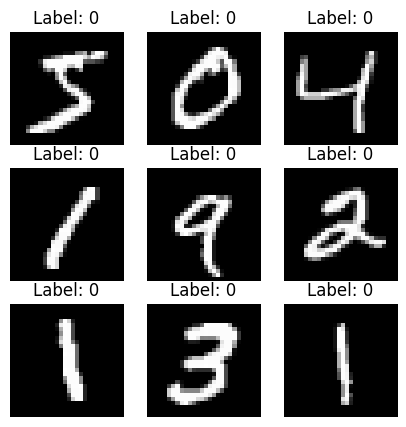

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load_data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan_contoh
plt.figure(figsize=(5,5))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label: {y_train[1]}")
  plt.axis('off')
plt.show()

Tugas Kecil: ganti range(9) dengan range(25)

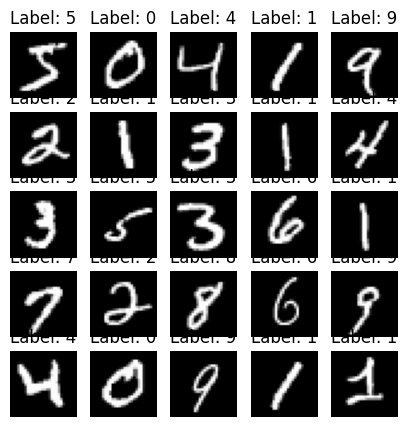

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


Tugas kecil: Ubah kernel dari linear menjadi rbf

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


Praktikum D3 – Membangun CNN Sederhana

Epoch 1/5


c:\Users\paulu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9424 - loss: 0.1930 - val_accuracy: 0.9807 - val_loss: 0.0703
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9828 - val_loss: 0.0623
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0425 - val_accuracy: 0.9877 - val_loss: 0.0516
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9868 - val_loss: 0.0510
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9878 - val_loss: 0.0490


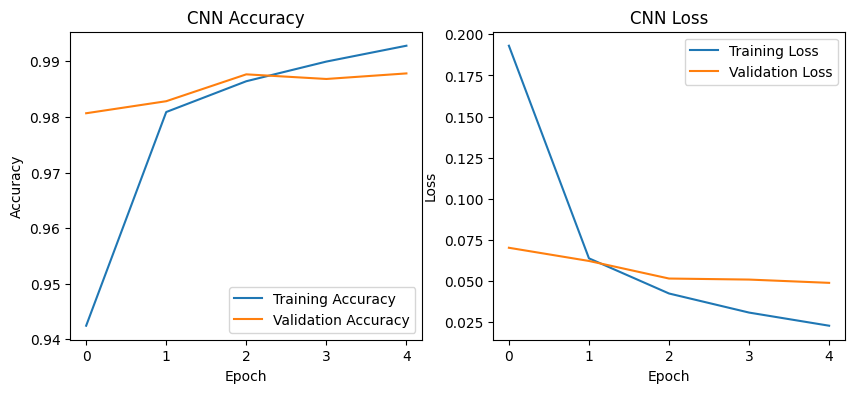

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn =  x_test.reshape (-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation ='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten.

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9579 - loss: 0.1387 - val_accuracy: 0.9875 - val_loss: 0.0510
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9897 - val_loss: 0.0367
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9893 - val_loss: 0.0401
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9883 - val_loss: 0.0393
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9900 - val_loss: 0.0421


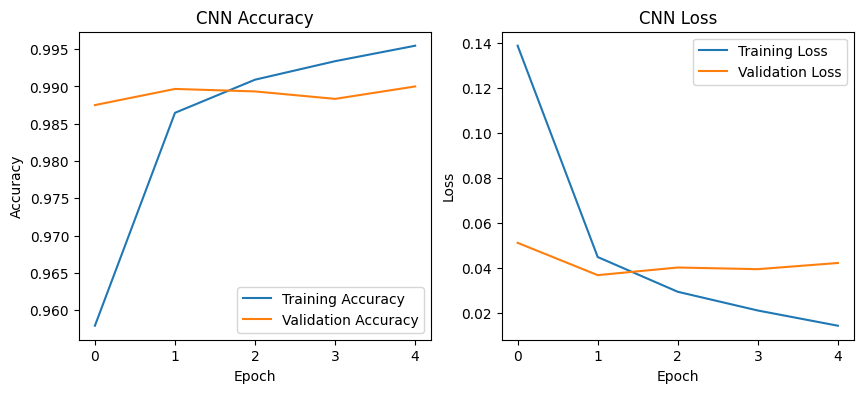

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) /255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 88s 1us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4322 - loss: 1.5511 - val_accuracy: 0.5360 - val_loss: 1.2849
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5752 - loss: 1.1978 - val_accuracy: 0.6194 - val_loss: 1.1023
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6326 - loss: 1.0490 - val_accuracy: 0.6184 - val_loss: 1.1010
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6690 - loss: 0.9448 - val_accuracy: 0.6634 - val_loss: 0.9754
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6954 - loss: 0.8683 - val_accuracy: 0.6770 - val_loss: 0.9217


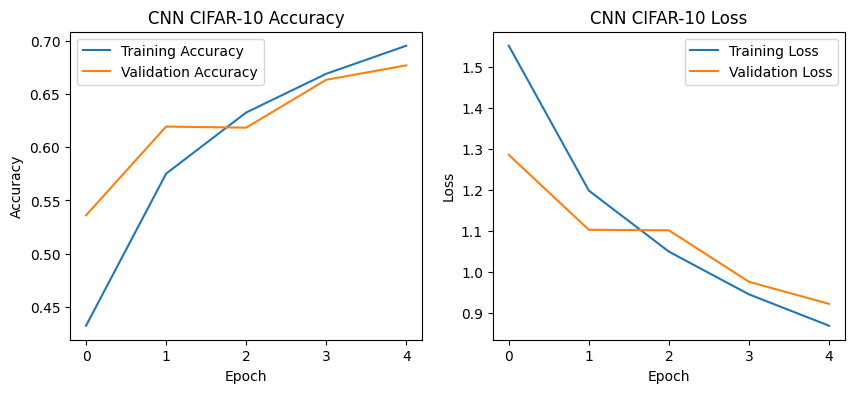

In [10]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential # Import Sequential explicitly
import matplotlib.pyplot as plt # Import pyplot


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([ # Use Sequential directly
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

#==== Plot History ====
plt.figure (figsize=(10,4)) # Typo in plt.figur

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil: Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir.

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3493 - loss: 1.7617 - val_accuracy: 0.5116 - val_loss: 1.3830
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4596 - loss: 1.4776 - val_accuracy: 0.5700 - val_loss: 1.2320
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5049 - loss: 1.3610 - val_accuracy: 0.6074 - val_loss: 1.1390
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5325 - loss: 1.2980 - val_accuracy: 0.6348 - val_loss: 1.0612
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5547 - loss: 1.2437 - val_accuracy: 0.6392 - val_loss: 1.0522
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5667 - loss: 1.2020 - val_accuracy: 0.6496 - val_loss: 1.0184
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5834 - loss: 1.1598 - val_accuracy: 0.6588 - val_loss: 0.9964
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5926 - loss: 1.1297 - 

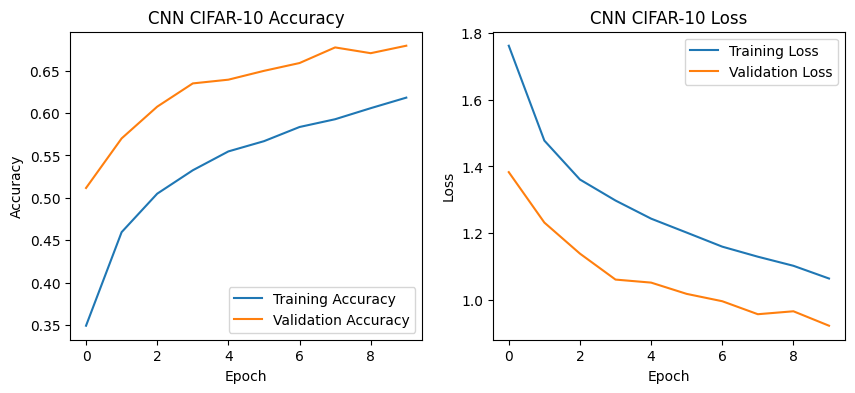

In [11]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D5 – Transfer Learning dengan Model Pra-Latih


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.5153 - loss: 1.3877 - val_accuracy: 0.5792 - val_loss: 1.2123
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.5830 - loss: 1.1999 - val_accuracy: 0.5866 - val_loss: 1.1741
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.6003 - loss: 1.1446 - val_accuracy: 0.5956 - val_loss: 1.1448
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.6142 - loss: 1.1037 - val_accuracy: 0.6138 - val_loss: 1.1178
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.6250 - loss: 1.0727 - val_accuracy: 0.5990 - val_loss: 1.1292


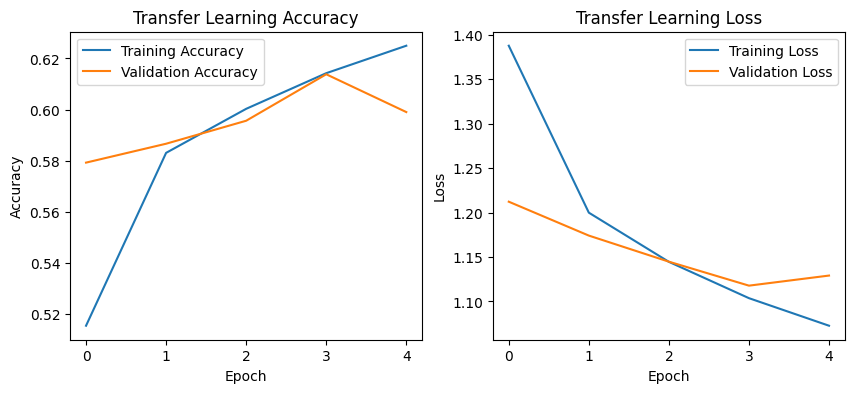

In [12]:
from tensorflow.keras.applications import VGG16

base_model = VGG16 (weights='imagenet', include_top=False,
                    input_shape=(32,32,3))
base_model.trainable = False

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil: Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning).

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.5637 - loss: 1.2458 - val_accuracy: 0.6108 - val_loss: 1.1001
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.6332 - loss: 1.0444 - val_accuracy: 0.6412 - val_loss: 1.0220
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 45ms/step - accuracy: 0.6578 - loss: 0.9760 - val_accuracy: 0.6352 - val_loss: 1.0401
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.6740 - loss: 0.9239 - val_accuracy: 0.6510 - val_loss: 0.9910
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.6904 - loss: 0.8780 - val_accuracy: 0.6678 - val_loss: 0.9577


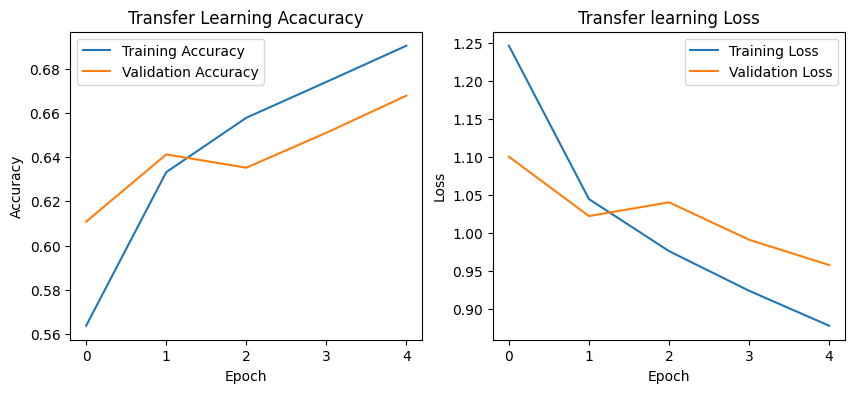

In [13]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

for layer in base_model.layers[-2:]:
  layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Acacuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.82      0.68      0.74      1000
           2       0.66      0.55      0.60      1000
           3       0.50      0.47      0.48      1000
           4       0.61      0.61      0.61      1000
           5       0.59      0.54      0.56      1000
           6       0.65      0.75      0.69      1000
           7       0.77      0.65      0.71      1000
           8       0.75      0.81      0.77      1000
           9       0.64      0.80      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



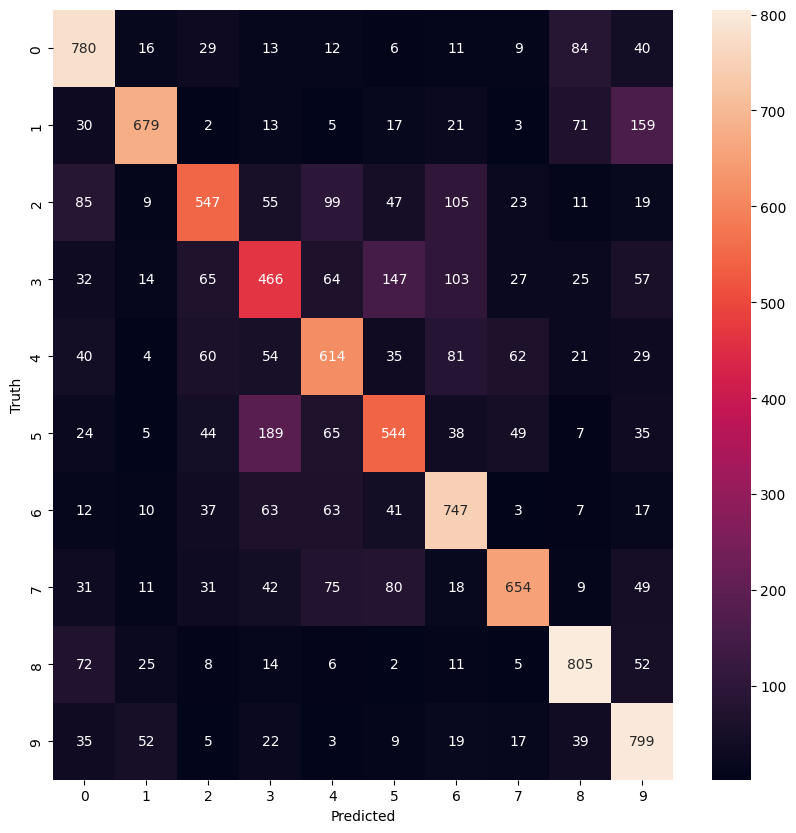

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test). argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show(  )

In [ ]:
TUGAS

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# bikin model CNN sederhana
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# save model
model.save("model_mnist_cnn.h5")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9570 - loss: 0.1411 - val_accuracy: 0.9840 - val_loss: 0.0551
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9850 - val_loss: 0.0502
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9912 - val_loss: 0.0330
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9895 - val_loss: 0.0385
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9949 - loss: 0.0163 - val_accuracy: 0.9913 - val_loss: 0.0361
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9954 - loss: 0.0131 - val_accuracy: 0.9923 - val_loss: 0.0294
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0103 - val_accuracy: 0.9907 - val_loss: 0.0343
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9970 - loss: 0.0086 - 

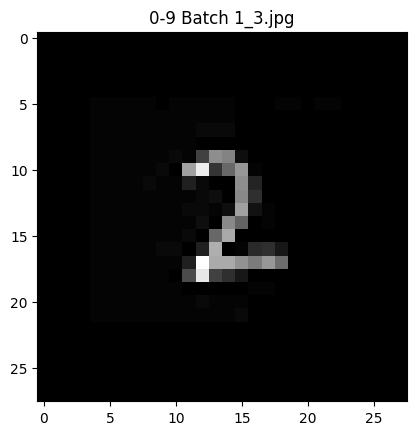

0-9 Batch 1_3.jpg → Prediksi: 2 (prob: 0.158)


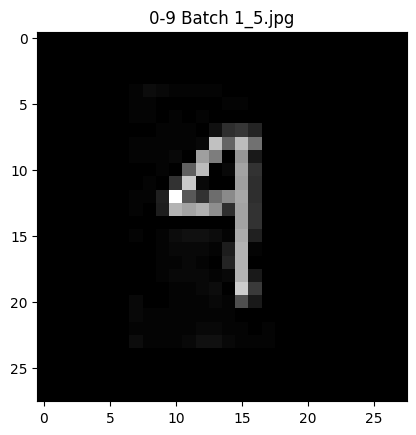

0-9 Batch 1_5.jpg → Prediksi: 9 (prob: 0.125)


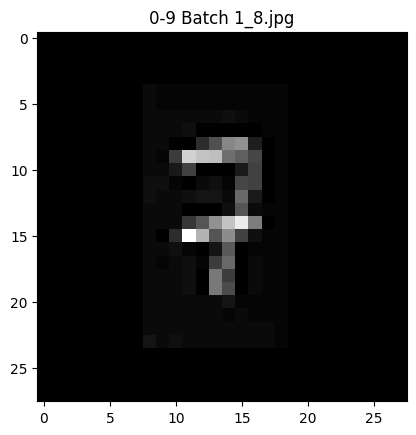

0-9 Batch 1_8.jpg → Prediksi: 1 (prob: 0.135)


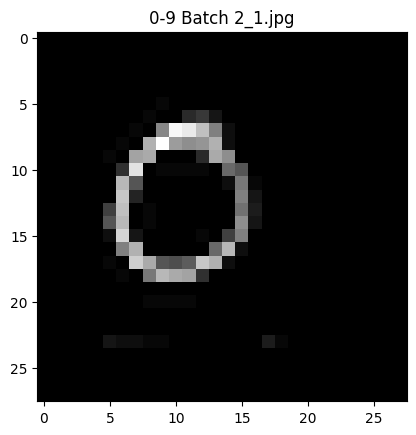

0-9 Batch 2_1.jpg → Prediksi: 1 (prob: 0.133)


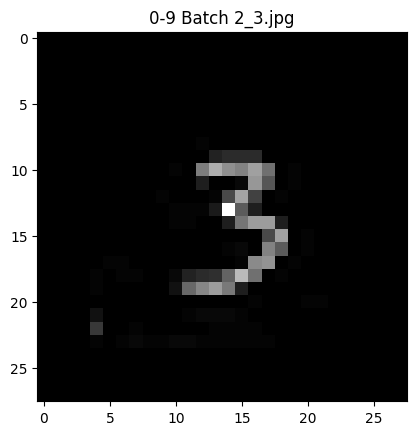

0-9 Batch 2_3.jpg → Prediksi: 0 (prob: 0.138)


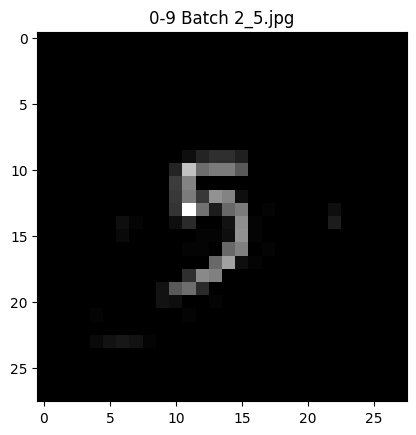

0-9 Batch 2_5.jpg → Prediksi: 1 (prob: 0.132)


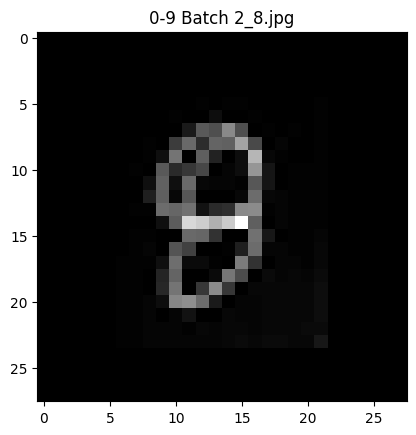

0-9 Batch 2_8.jpg → Prediksi: 9 (prob: 0.244)


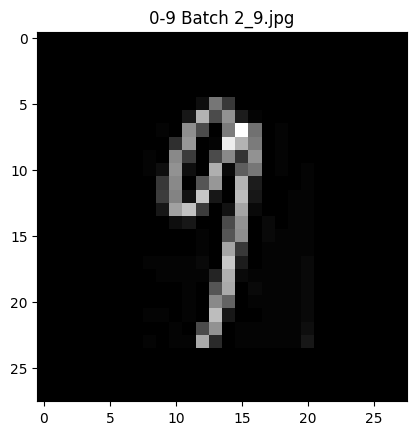

0-9 Batch 2_9.jpg → Prediksi: 1 (prob: 0.130)


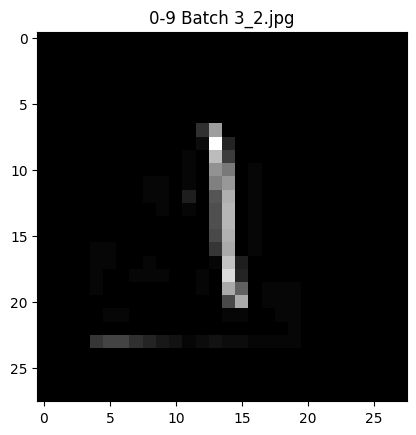

0-9 Batch 3_2.jpg → Prediksi: 1 (prob: 0.143)


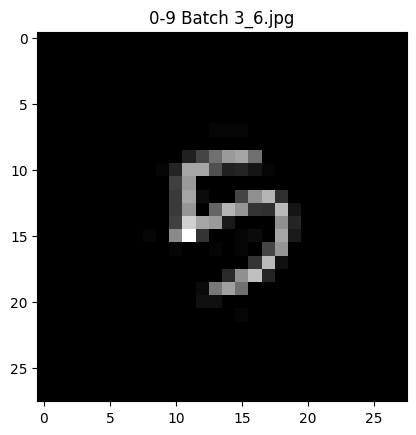

0-9 Batch 3_6.jpg → Prediksi: 5 (prob: 0.127)


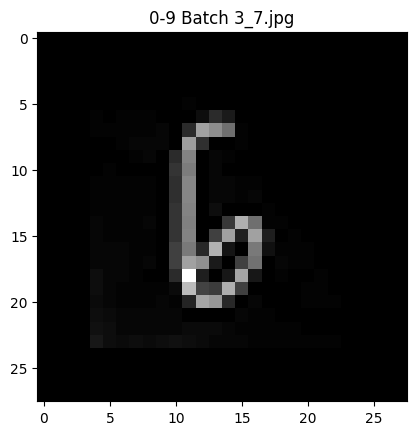

0-9 Batch 3_7.jpg → Prediksi: 6 (prob: 0.144)


In [10]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import glob

# -------------------
# Fungsi preprocessing
# -------------------
def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')                
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    if arr.mean() > 127:                      
        img = ImageOps.invert(img)
        arr = np.array(img)

    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w,h = img.size

    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    arr = np.array(canvas).astype('float32')/255.0
    return canvas, arr.reshape(28,28,1)

# -------------------
# Load model
# -------------------
# Kalau CNN (Keras)
from tensorflow import keras
model = keras.models.load_model("model_mnist_cnn.h5")

# Kalau SVM (sklearn)
# import joblib
# clf = joblib.load("svm_mnist.pkl")

# -------------------
# Prediksi semua file PNG/JPG di folder ini
# -------------------
for fn in glob.glob("*.png") + glob.glob("*.jpg"):
    img = Image.open(fn)
    disp, x = preprocess_to_mnist_28x28(img)

    plt.imshow(disp, cmap='gray')
    plt.title(fn)
    plt.show()

    # ==== CNN ====
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = np.argmax(probs)
    conf = np.max(probs)
    print(f"{fn} → Prediksi: {pred} (prob: {conf:.3f})")

    # ==== SVM ====
    # x_flat = x.reshape(-1, 784)
    # pred = clf.predict(x_flat)[0]
    # print(f"{fn} → Prediksi: {pred}")